<h1 align="center">Financial Transaction Fraud Detection<h1>

## Problem Description:

<a src="">PaySim</a> simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

## Dictionary:

This is a sample of 1 row with headers explanation:

**[1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0]**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.



## Imbalaned Data:

Out of 6,362,620 observation, no more than 0.13% of them are labeled as a fraud transaction. This imbalance requires more careful approaches for us to build models and evaluate its performance. For example, accuracy metrics is not a reasonable indicator of the performance anymore. A classifier can has more than 99% of accuracy by predicting the lable always as negative. 

## Table of Contents:

1. Introduction
2. Exploratory Analysis
3. Feature Engineering
4. Predictive Modeling
5. Conclusion


## References:

1. Lopez-Rojas, Edgar Alonso, <a href="http://bth.diva-portal.org/smash/record.jsf?pid=diva2%3A955852&dswid=663"> *Applying Simulation to the Problem of Detecting Financial Fraud*</a>, Blekinge Institute of Techno

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import imblearn.over_sampling import RandomOverSampler

%matplotlib inline

In [19]:
df = pd.read_csv("./money_trasfer/PS_20174392719_1491204439457_log.csv")

df.rename({'oldbalanceOrg':'oldBalanceOrg', 'newbalanceOrig':'newBalanceOrg', 'oldbalanceDest':'oldBalanceDest',
          'newblanceDest':'newBalanceDest'})

print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [23]:
# No missing values
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

Type list:  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Which is flagged fraud:  ['TRANSFER']
Which is fraud:  ['TRANSFER' 'CASH_OUT']


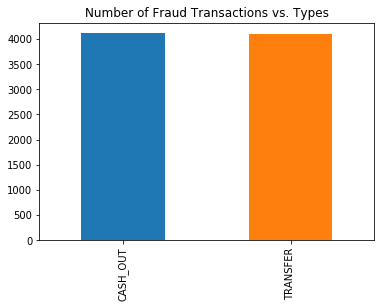

In [63]:
print("Type list: ", df['type'].unique())
print("Which is flagged fraud: ", df[df['isFlaggedFraud']==1]['type'].unique())
print("Which is fraud: ", df[df['isFraud']==1]['type'].unique())


df[df['isFraud']==1]["type"].value_counts().plot(kind="bar", title="Number of Fraud Transactions vs. Types")